# Level 9: connect the dots

[http://www.pythonchallenge.com/pc/return/good.html](http://www.pythonchallenge.com/pc/return/good.html)

# 線索

圖片上有一堆黑點，但看不太出來端倪，來看一下 html source
```html
<!--
first+second=?

first:
146,399,163,403,170,393,169,391,166,386,170,381,170,371,170,355,169,346,167,335,170,329,170,320,170,
310,171,301,173,290,178,289,182,287,188,286,190,286,192,291,194,296,195,305,194,307,191,312,190,316,
190,321,192,331,193,338,196,341,197,346,199,352,198,360,197,366,197,373,196,380,197,383,196,387,192,
389,191,392,190,396,189,400,194,401,201,402,208,403,213,402,216,401,219,397,219,393,216,390,215,385,
215,379,213,373,213,365,212,360,210,353,210,347,212,338,213,329,214,319,215,311,215,306,216,296,218,
290,221,283,225,282,233,284,238,287,243,290,250,291,255,294,261,293,265,291,271,291,273,289,278,287,
279,285,281,280,284,278,284,276,287,277,289,283,291,286,294,291,296,295,299,300,301,304,304,320,305,
327,306,332,307,341,306,349,303,354,301,364,301,371,297,375,292,384,291,386,302,393,324,391,333,387,
328,375,329,367,329,353,330,341,331,328,336,319,338,310,341,304,341,285,341,278,343,269,344,262,346,
259,346,251,349,259,349,264,349,273,349,280,349,288,349,295,349,298,354,293,356,286,354,279,352,268,
352,257,351,249,350,234,351,211,352,197,354,185,353,171,351,154,348,147,342,137,339,132,330,122,327,
120,314,116,304,117,293,118,284,118,281,122,275,128,265,129,257,131,244,133,239,134,228,136,221,137,
214,138,209,135,201,132,192,130,184,131,175,129,170,131,159,134,157,134,160,130,170,125,176,114,176,
102,173,103,172,108,171,111,163,115,156,116,149,117,142,116,136,115,129,115,124,115,120,115,115,117,
113,120,109,122,102,122,100,121,95,121,89,115,87,110,82,109,84,118,89,123,93,129,100,130,108,132,110,
133,110,136,107,138,105,140,95,138,86,141,79,149,77,155,81,162,90,165,97,167,99,171,109,171,107,161,
111,156,113,170,115,185,118,208,117,223,121,239,128,251,133,259,136,266,139,276,143,290,148,310,151,
332,155,348,156,353,153,366,149,379,147,394,146,399

second:
156,141,165,135,169,131,176,130,187,134,191,140,191,146,186,150,179,155,175,157,168,157,163,157,159,
157,158,164,159,175,159,181,157,191,154,197,153,205,153,210,152,212,147,215,146,218,143,220,132,220,
125,217,119,209,116,196,115,185,114,172,114,167,112,161,109,165,107,170,99,171,97,167,89,164,81,162,
77,155,81,148,87,140,96,138,105,141,110,136,111,126,113,129,118,117,128,114,137,115,146,114,155,115,
158,121,157,128,156,134,157,136,156,136

-->
```

算了一下 first 跟 second 裡的項目都是偶數個，應該是座標？

# 嘗試

標題說 connect the dots，那麼就來玩連連看

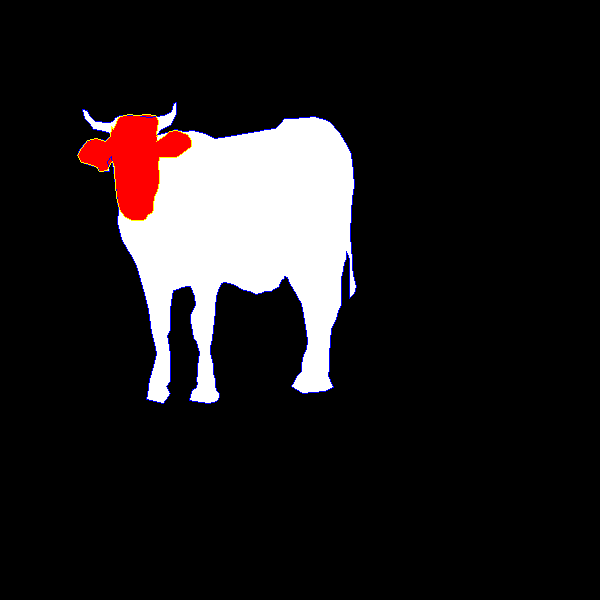

In [2]:
from PIL import Image, ImageDraw

first = [*map(int, "146,399,163,403,170,393,169,391,166,386,170,381,170,371,170,355,169,346,167,335,170,329,170,320,170,310,171,301,173,290,178,289,182,287,188,286,190,286,192,291,194,296,195,305,194,307,191,312,190,316,190,321,192,331,193,338,196,341,197,346,199,352,198,360,197,366,197,373,196,380,197,383,196,387,192,389,191,392,190,396,189,400,194,401,201,402,208,403,213,402,216,401,219,397,219,393,216,390,215,385,215,379,213,373,213,365,212,360,210,353,210,347,212,338,213,329,214,319,215,311,215,306,216,296,218,290,221,283,225,282,233,284,238,287,243,290,250,291,255,294,261,293,265,291,271,291,273,289,278,287,279,285,281,280,284,278,284,276,287,277,289,283,291,286,294,291,296,295,299,300,301,304,304,320,305,327,306,332,307,341,306,349,303,354,301,364,301,371,297,375,292,384,291,386,302,393,324,391,333,387,328,375,329,367,329,353,330,341,331,328,336,319,338,310,341,304,341,285,341,278,343,269,344,262,346,259,346,251,349,259,349,264,349,273,349,280,349,288,349,295,349,298,354,293,356,286,354,279,352,268,352,257,351,249,350,234,351,211,352,197,354,185,353,171,351,154,348,147,342,137,339,132,330,122,327,120,314,116,304,117,293,118,284,118,281,122,275,128,265,129,257,131,244,133,239,134,228,136,221,137,214,138,209,135,201,132,192,130,184,131,175,129,170,131,159,134,157,134,160,130,170,125,176,114,176,102,173,103,172,108,171,111,163,115,156,116,149,117,142,116,136,115,129,115,124,115,120,115,115,117,113,120,109,122,102,122,100,121,95,121,89,115,87,110,82,109,84,118,89,123,93,129,100,130,108,132,110,133,110,136,107,138,105,140,95,138,86,141,79,149,77,155,81,162,90,165,97,167,99,171,109,171,107,161,111,156,113,170,115,185,118,208,117,223,121,239,128,251,133,259,136,266,139,276,143,290,148,310,151,332,155,348,156,353,153,366,149,379,147,394,146,399".split(","))]
second = [*map(int, "156,141,165,135,169,131,176,130,187,134,191,140,191,146,186,150,179,155,175,157,168,157,163,157,159,157,158,164,159,175,159,181,157,191,154,197,153,205,153,210,152,212,147,215,146,218,143,220,132,220,125,217,119,209,116,196,115,185,114,172,114,167,112,161,109,165,107,170,99,171,97,167,89,164,81,162,77,155,81,148,87,140,96,138,105,141,110,136,111,126,113,129,118,117,128,114,137,115,146,114,155,115,158,121,157,128,156,134,157,136,156,136".split(","))]

first_points = [(first[i], first[i + 1]) for i in range(0, len(first), 2)]
second_points = [(second[i], second[i + 1]) for i in range(0, len(second), 2)]

im = Image.new("RGB", (600, 600))
draw = ImageDraw.Draw(im)

draw.polygon(first_points, fill="white")
draw.polygon(second_points, fill="red")

draw.line(first_points, fill="blue")
draw.line(second_points, fill="yellow")

# im.show()
display(im)

OK，一頭牛

試看看將網址改為 ```http://www.pythonchallenge.com/pc/return/cow.html```，得到：
> hmm. it's a male. 

公牛是吧......

那麼下一關的網址就是 ```http://www.pythonchallenge.com/pc/return/bull.html```